# 第三章：数据探索

收集到初步的样本数据后，接下来要考虑的问题：
- 样本数据集的数量和质量是否满足模型构建的需求？
- 是否出现从未设想过的数据状态？
- 其中有没有明显的规律和趋势？
- 各因素之间有什么样的关联性？

## 数据质量分析

数据质量分析是数据准备过程中最重要的一环，是数据预处理的前提，也是数据挖掘结论有效性和准确性的基础。

数据质量分析的主要任务是检查原始数据中是否存在脏数据，脏数据一般是指不符合要求，以及不能直接进行相应分析的数据。

在常见的数据挖掘工作中，脏数据包括如下内容：
- 缺失值
- 异常值
- 不一致的值
- 重复数据以及含有特殊符号（如#、￥、*等）的数据

### 缺失值分析

- 记录的缺失
- 记录中某个字段的缺失

缺失值产生的原因：
- 信息暂时不能或者不易获取
- 信息由于人为或者非人为的原因被遗漏
- 属性值不存在（如单身人士的配偶信息等）

缺失值的影响
- 丢失大量有用信息
- 增加不确定性
- 更加难以掌握规律
- 包括空值的数据使建模过程陷入混乱，导致不可靠的输出

缺失值的分析
- 含有缺失值的属性个数
- 每个属性的缺失数、缺失率

缺失值的处理
- 删除含有缺失值的记录
- 对可能值进行插补
- 不处理

### 异常值分析

检验是否有录入错误或者不合常理的数据。

分析异常值产生的原因，常常成为发现问题并改进决策的良机。

- 简单统计量分析：最大值、最小值，看是否符合常识
- 符合正太分布的量：3σ原则
- 不符合正态分布的量：利用远离平均值的标准差个数来衡量
- 箱型图分析（Ql - 1.5*IQR ~ Qr + 1.5IQR）

In [1]:
import pandas as pd

In [2]:
catering_sale = './data/data_3/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col='日期')
data.head()

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1


In [3]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


In [4]:
len(data)

201

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

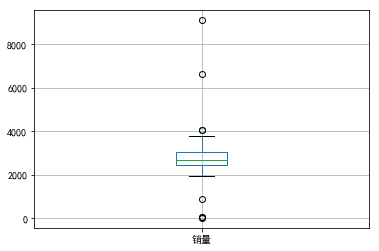

In [7]:
data.boxplot()

### 一致性分析

不一致数据的产生主要在数据集成的过程中，可能由于数据来自不同的数据源，未能完全同步更新造成。

## 数据特征分析

### 分布分析

- 定量数据的分布分析：频率分布直方图
- 定性数据的分布分析：饼图、条形图

### 对比分析

- 绝对数比较：比较绝对数值，发现并分析差异
- 相对数比较
    - 结构相对数：同一总体内部分数值与全部数值对比求得比重
    - 比例相对数：同一总体内不同部分的数值进行对比
    - 比较相对数：同一时间不同空间，两个性质相同的数值进行对比
    - 强度相对数：两个性质不同但有一定联系的数值对比，密度、平均国民生产值等
    - 计划完成程度相对数：某一时期完成数与计划数的对比
    - 动态相对数：同一现象在不同时期的指标数值对比，说明发展的方向和变化速度

### 统计量分析

- 集中趋势：均值和中位数
- 离中趋势：标准差、方差和四分位间距

In [8]:
import pandas as pd

In [9]:
catering_sale = './data/data_3/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col='日期')
data = data[(data['销量'] > 400) & (data['销量'] < 5000)]
stats = data.describe()

stats.loc['range'] = stats.loc['max'] - stats.loc['min']
stats.loc['dis'] = stats.loc['75%'] - stats.loc['25%']
stats

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000
range,3200.200000
dis,562.600000


### 周期性分析

### 贡献度分析（帕累托分析）

In [10]:
dish_profit = './data/data_3/catering_dish_profit.xls'
data = pd.read_excel(dish_profit)
data = data.drop('菜品ID', axis=1)
data

,菜品名,盈利
0,A1,9173
1,A2,5729
2,A3,4811
3,A4,3594
4,A5,3195
5,A6,3026
6,A7,2378
7,A8,1970
8,A9,1877
9,A10,1782


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [12]:
sns.set_palette('muted')

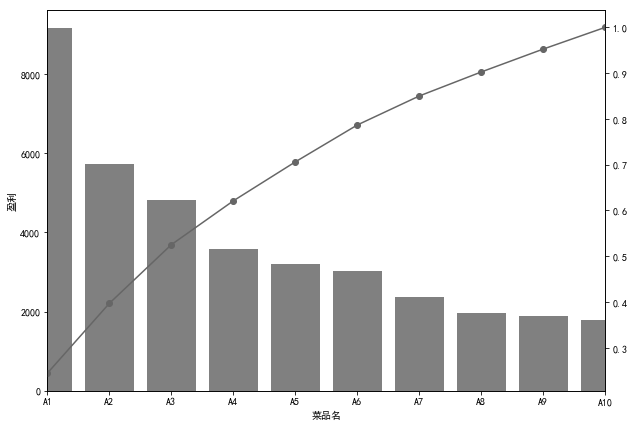

In [13]:
plt.figure(figsize=(10, 7))
sns.barplot(data=data, x='菜品名', y='盈利', color='0.5')
data['percents'] = data['盈利'].cumsum() / data['盈利'].sum()
data.percents.plot(secondary_y=True, style='-o', color='0.4')
plt.show()

### 相关性分析

- Pearson相关系数：
    - 两个连续性变量之间的关系
    - 假定连续变量的取值服从正态分布 
    - 只有在变量之间具有线性关系时，才是完全Pearson相关的
    - -1（完全负线性相关） ~ 1（完全正线性相关）
- Spearman秩相关系数（等级相关系数）：
    - 不符合正态分布的变量、分类变量之间的关联性
    - 只要两个变量具有严格单调的函数关系，那么它们就是完全Spearman相关的
- 判定系数
    - 相关系数的平方
    - 0（完全不相关） ~ 1（完全相关）

In [14]:
catering_sale = './data/data_3/catering_sale_all.xls'
data = pd.read_excel(catering_sale, index_col='日期')
data.corr()['百合酱蒸凤爪'].sort_values(ascending=False)

百合酱蒸凤爪     1.000000
乐膳真味鸡      0.455638
原汁原味菜心     0.428316
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
蜜汁焗餐包      0.098085
金银蒜汁蒸排骨    0.016799
翡翠蒸香茜饺     0.009206
香煎罗卜糕     -0.090276
Name: 百合酱蒸凤爪, dtype: float64

从上面相关系数可知，点了百合酱蒸凤爪的顾客，同时点乐膳真味鸡、原汁原味菜心的可能性较高。

## Python主要数据探索函数

### 基本统计特征函数

sum, mean, var, std, corr, cov, skew, kurt, describe

### 拓展统计特征函数

cumsum, cumprob, cummax, cummin

rolling_sum, rolling_mean, rolling_var, rolling_std, rolling_corr, rolling_cov, rolling_skew, rolling_kurt

### 统计作图函数

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [16]:
from matplotlib import font_manager as fm

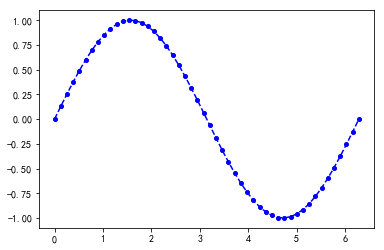

In [17]:
import numpy as np
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
plt.plot(x, y, 'bo--', markersize=4, linewidth=1.5)
plt.show()

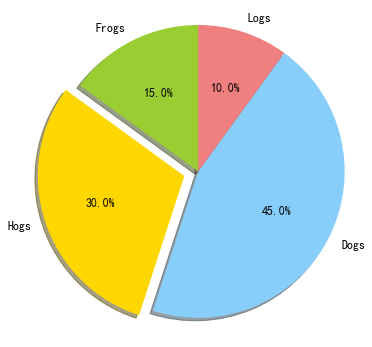

In [18]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = [0, 0.1, 0, 0]
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'size': 'large'})
plt.axis('equal')
plt.show()

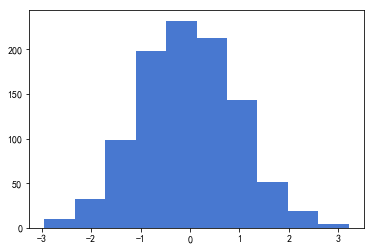

In [19]:
x = np.random.randn(1000)
plt.hist(x, 10)
plt.show()

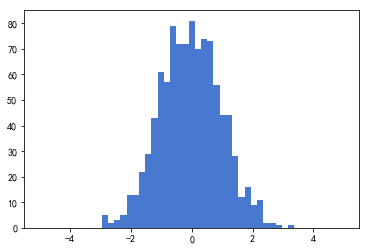

In [20]:
plt.hist(x, np.linspace(-5, 5, 50))
plt.show()

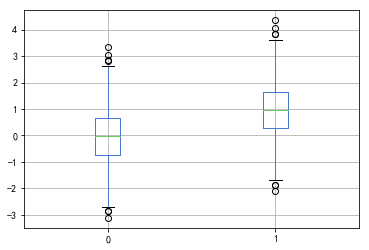

In [21]:
x = np.random.randn(1000)
D = pd.DataFrame([x, x+1]).T
D.boxplot()
plt.show()

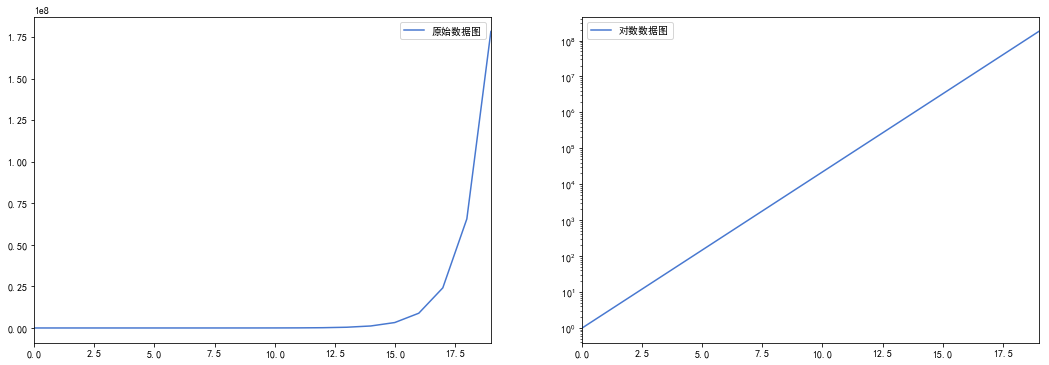

In [22]:
x = pd.Series(np.exp(np.arange(20)))
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
x.plot(label='原始数据图', legend=True)
plt.subplot(1, 2, 2)
x.plot(logy=True, label='对数数据图', legend=True)
plt.show()

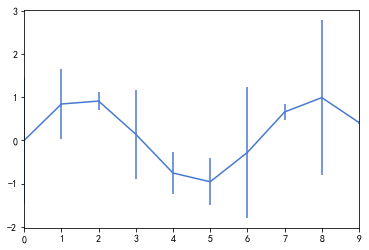

In [23]:
error = np.random.randn(10)
y = pd.Series(np.sin(np.arange(10)))
y.plot(yerr=error)
plt.show()